In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv('d:\maschineLearning\zoomcamp\week3\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

# Data preparation

In [5]:
df.iloc[:10].T

,0,1,2,3,4,5,6,7,8,9
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0,1206.0,1551.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0,595.0,714.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0,226700.0,261100.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [6]:
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity',

('ocean_proximity',)

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df = df.fillna(0)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [10]:
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [11]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
df['ocean_proximity'].nunique()

5

In [13]:
df['ocean_proximity'].mode()[0]     #Q1

'<1H OCEAN'

# Split the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [16]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [17]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [18]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [19]:
df_train.head().T

,0,1,2,3,4
longitude,-119.67,-118.32,-121.62,-118.63,-122.3
latitude,34.43,33.74,39.13,34.24,37.52
housing_median_age,39.0,24.0,41.0,9.0,38.0
total_rooms,1467.0,6097.0,1317.0,4759.0,2769.0
total_bedrooms,381.0,794.0,309.0,924.0,387.0
population,1404.0,2248.0,856.0,1884.0,994.0
households,374.0,806.0,337.0,915.0,395.0
median_income,2.3681,10.1357,1.6719,4.8333,5.5902
ocean_proximity,<1H OCEAN,NEAR OCEAN,INLAND,<1H OCEAN,NEAR OCEAN
rooms_per_household,3.92246,7.564516,3.908012,5.201093,7.010127


In [20]:
numerical = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'rooms_per_household',
'bedrooms_per_room',
'population_per_household']

In [21]:
corr_matrix = df_train[numerical].corr()
corr_matrix = corr_matrix.round(3)
corr_matrix

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000,-0.925,0.002,-0.026,-0.060,-0.100,-0.064,-0.077,0.119,-0.125,-0.002
longitude,-0.925,1.000,-0.100,0.036,0.064,0.092,0.050,-0.016,-0.035,0.102,0.011
housing_median_age,0.002,-0.100,1.000,-0.364,-0.324,-0.292,-0.306,-0.120,-0.181,0.129,0.012
total_rooms,-0.026,0.036,-0.364,1.000,0.932,0.853,0.921,0.199,0.169,-0.194,-0.029
total_bedrooms,-0.060,0.064,-0.324,0.932,1.000,0.877,0.979,-0.010,0.010,0.078,-0.034
population,-0.100,0.092,-0.292,0.853,0.877,1.000,0.907,-0.001,-0.076,0.032,0.065
households,-0.064,0.050,-0.306,0.921,0.979,0.907,1.000,0.012,-0.086,0.058,-0.033
median_income,-0.077,-0.016,-0.120,0.199,-0.010,-0.001,0.012,1.000,0.394,-0.617,-0.000
rooms_per_household,0.119,-0.035,-0.181,0.169,0.010,-0.076,-0.086,0.394,1.000,-0.501,0.002
bedrooms_per_room,-0.125,0.102,0.129,-0.194,0.078,0.032,0.058,-0.617,-0.501,1.000,-0.003


In [22]:
import seaborn as sn

In [23]:
plt.rcParams['figure.figsize'] = 7, 7

<AxesSubplot:>

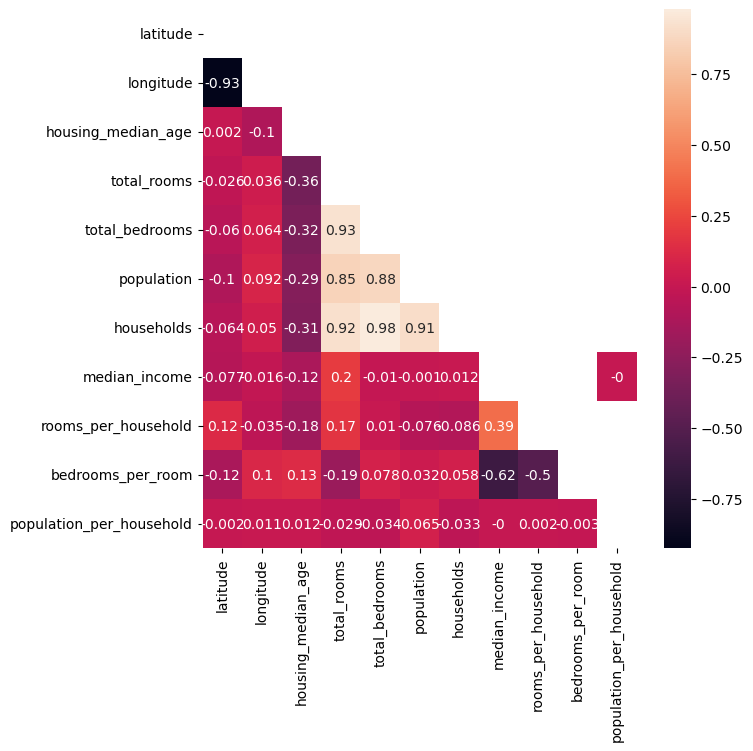

In [24]:
sn.heatmap(corr_matrix, annot = True, mask = np.triu(corr_matrix))

In [25]:
#Question 2 'households'  'total_bedrooms'

# Make median_house_value binary

In [26]:
above_average = (y_train > y_train.mean()).astype(int)

In [27]:
above_average

array([1, 1, 0, ..., 1, 0, 0])

In [28]:
len(above_average)

12384

In [29]:
from sklearn.metrics import mutual_info_score

In [30]:
score = mutual_info_score(above_average, df_train['ocean_proximity'])
score

0.10138385763624205

In [31]:
round(score, 2) #Question 3

0.1

In [32]:
above_average_all = (y_train > df['median_house_value'].values.mean()).astype(int)
score_all = mutual_info_score(above_average_all, df_train['ocean_proximity'])
score_all == score

True

In [33]:
df['median_house_value'].values.mean()

206855.81690891474

In [34]:
y_train.mean()

206807.7419250646

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [37]:
df_train_cat = ohe.fit_transform(df_train[['ocean_proximity']])
df_train_cat

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [38]:
ohe.get_feature_names()

C:\Users\Asus\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_<1H OCEAN', 'x0_INLAND', 'x0_ISLAND', 'x0_NEAR BAY',
       'x0_NEAR OCEAN'], dtype=object)

In [39]:
df_train_num = df_train.drop('ocean_proximity', axis = 1)
df_train_num.T

,0,1,2,3,4,5,6,7,8,9,...,12374,12375,12376,12377,12378,12379,12380,12381,12382,12383
longitude,-119.670000,-118.320000,-121.620000,-118.630000,-122.300000,-118.110000,-118.370000,-118.390000,-118.540000,-119.230000,...,-118.360000,-118.440000,-121.270000,-118.130000,-118.490000,-118.290000,-121.340000,-116.990000,-117.870000,-118.320000
latitude,34.430000,33.740000,39.130000,34.240000,37.520000,33.730000,34.140000,34.060000,34.300000,36.390000,...,33.790000,34.030000,38.110000,34.020000,34.020000,33.790000,38.040000,32.740000,33.840000,33.910000
housing_median_age,39.000000,24.000000,41.000000,9.000000,38.000000,32.000000,21.000000,39.000000,22.000000,39.000000,...,34.000000,25.000000,11.000000,38.000000,29.000000,16.000000,16.000000,18.000000,16.000000,35.000000
total_rooms,1467.000000,6097.000000,1317.000000,4759.000000,2769.000000,1258.000000,4670.000000,3299.000000,4423.000000,1660.000000,...,5166.000000,2059.000000,3163.000000,1243.000000,2709.000000,1867.000000,3295.000000,3341.000000,1545.000000,940.000000
total_bedrooms,381.000000,794.000000,309.000000,924.000000,387.000000,333.000000,1161.000000,831.000000,622.000000,349.000000,...,704.000000,659.000000,794.000000,310.000000,799.000000,571.000000,565.000000,611.000000,354.000000,197.000000
population,1404.000000,2248.000000,856.000000,1884.000000,994.000000,645.000000,1914.000000,1649.000000,1995.000000,1061.000000,...,2071.000000,1349.000000,2106.000000,788.000000,1238.000000,951.000000,2279.000000,1952.000000,730.000000,640.000000
households,374.000000,806.000000,337.000000,915.000000,395.000000,334.000000,1094.000000,759.000000,582.000000,306.000000,...,668.000000,588.000000,762.000000,286.000000,793.000000,498.000000,576.000000,602.000000,350.000000,215.000000
median_income,2.368100,10.135700,1.671900,4.833300,5.590200,5.047600,3.798600,3.329500,8.215900,1.481200,...,8.360900,3.239600,2.448200,2.585200,3.156300,3.342700,3.608300,3.984400,4.511200,4.200000
rooms_per_household,3.922460,7.564516,3.908012,5.201093,7.010127,3.766467,4.268739,4.346509,7.599656,5.424837,...,7.733533,3.501701,4.150919,4.346154,3.416141,3.748996,5.720486,5.549834,4.414286,4.372093
bedrooms_per_room,0.259714,0.130228,0.234624,0.194158,0.139762,0.264706,0.248608,0.251895,0.140629,0.210241,...,0.136276,0.320058,0.251028,0.249397,0.294943,0.305838,0.171472,0.182879,0.229126,0.209574


In [40]:
x_train = np.column_stack([df_train_num, df_train_cat])

In [41]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,12374,12375,12376,12377,12378,12379,12380,12381,12382,12383
longitude,-119.67,-118.32,-121.62,-118.63,-122.3,-118.11,-118.37,-118.39,-118.54,-119.23,...,-118.36,-118.44,-121.27,-118.13,-118.49,-118.29,-121.34,-116.99,-117.87,-118.32
latitude,34.43,33.74,39.13,34.24,37.52,33.73,34.14,34.06,34.3,36.39,...,33.79,34.03,38.11,34.02,34.02,33.79,38.04,32.74,33.84,33.91
housing_median_age,39.0,24.0,41.0,9.0,38.0,32.0,21.0,39.0,22.0,39.0,...,34.0,25.0,11.0,38.0,29.0,16.0,16.0,18.0,16.0,35.0
total_rooms,1467.0,6097.0,1317.0,4759.0,2769.0,1258.0,4670.0,3299.0,4423.0,1660.0,...,5166.0,2059.0,3163.0,1243.0,2709.0,1867.0,3295.0,3341.0,1545.0,940.0
total_bedrooms,381.0,794.0,309.0,924.0,387.0,333.0,1161.0,831.0,622.0,349.0,...,704.0,659.0,794.0,310.0,799.0,571.0,565.0,611.0,354.0,197.0
population,1404.0,2248.0,856.0,1884.0,994.0,645.0,1914.0,1649.0,1995.0,1061.0,...,2071.0,1349.0,2106.0,788.0,1238.0,951.0,2279.0,1952.0,730.0,640.0
households,374.0,806.0,337.0,915.0,395.0,334.0,1094.0,759.0,582.0,306.0,...,668.0,588.0,762.0,286.0,793.0,498.0,576.0,602.0,350.0,215.0
median_income,2.3681,10.1357,1.6719,4.8333,5.5902,5.0476,3.7986,3.3295,8.2159,1.4812,...,8.3609,3.2396,2.4482,2.5852,3.1563,3.3427,3.6083,3.9844,4.5112,4.2
ocean_proximity,<1H OCEAN,NEAR OCEAN,INLAND,<1H OCEAN,NEAR OCEAN,NEAR OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,INLAND,...,NEAR OCEAN,<1H OCEAN,INLAND,<1H OCEAN,<1H OCEAN,<1H OCEAN,INLAND,<1H OCEAN,<1H OCEAN,<1H OCEAN
rooms_per_household,3.92246,7.564516,3.908012,5.201093,7.010127,3.766467,4.268739,4.346509,7.599656,5.424837,...,7.733533,3.501701,4.150919,4.346154,3.416141,3.748996,5.720486,5.549834,4.414286,4.372093


In [42]:
x_train.round(3)

array([[-119.67,   34.43,   39.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.32,   33.74,   24.  , ...,    0.  ,    0.  ,    1.  ],
       [-121.62,   39.13,   41.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [-116.99,   32.74,   18.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.87,   33.84,   16.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.32,   33.91,   35.  , ...,    0.  ,    0.  ,    0.  ]])

In [43]:
x_train[0]

array([-1.19670000e+02,  3.44300000e+01,  3.90000000e+01,  1.46700000e+03,
        3.81000000e+02,  1.40400000e+03,  3.74000000e+02,  2.36810000e+00,
        3.92245989e+00,  2.59713701e-01,  3.75401070e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [44]:
from sklearn.feature_extraction import DictVectorizer

In [45]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train_vect = dv.fit_transform(train_dict)


In [46]:
dv.get_feature_names()

C:\Users\Asus\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [85]:
#train_dict

In [48]:
X_train_vect.round(3)

array([[2.600e-01, 3.740e+02, 3.900e+01, ..., 3.922e+00, 3.810e+02,
        1.467e+03],
       [1.300e-01, 8.060e+02, 2.400e+01, ..., 7.565e+00, 7.940e+02,
        6.097e+03],
       [2.350e-01, 3.370e+02, 4.100e+01, ..., 3.908e+00, 3.090e+02,
        1.317e+03],
       ...,
       [1.830e-01, 6.020e+02, 1.800e+01, ..., 5.550e+00, 6.110e+02,
        3.341e+03],
       [2.290e-01, 3.500e+02, 1.600e+01, ..., 4.414e+00, 3.540e+02,
        1.545e+03],
       [2.100e-01, 2.150e+02, 3.500e+01, ..., 4.372e+00, 1.970e+02,
        9.400e+02]])

In [49]:
list(X_train_vect[0])

[0.25971370143149286,
 374.0,
 39.0,
 34.43,
 -119.67,
 2.3681,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1404.0,
 3.7540106951871657,
 3.9224598930481283,
 381.0,
 1467.0]

# LogisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [52]:
len(above_average)

12384

In [53]:
model.fit(x_train, above_average)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [54]:
model.intercept_[0]

-0.6049581344156287

In [55]:
model.coef_[0].round(3)

array([ 7.700e-02,  9.000e-02,  3.500e-02, -0.000e+00,  1.000e-03,
       -2.000e-03,  4.000e-03,  1.226e+00,  2.000e-03,  1.873e+00,
        1.100e-02,  2.320e-01, -1.866e+00,  1.990e-01,  2.430e-01,
        5.870e-01])

In [56]:
df_val_cat = ohe.fit_transform(df_val[['ocean_proximity']])
df_val_num = df_val.drop('ocean_proximity', axis = 1)
x_val = np.column_stack([df_val_num, df_val_cat])

In [57]:
y_pred_val = model.predict_proba(x_val)[:, 1]

In [58]:
y_pred_val

array([0.07633277, 0.15259881, 0.95056606, ..., 0.95916907, 0.84889934,
       0.49259733])

In [59]:
above_average_val = (y_val > y_val.mean()).astype(int)

In [60]:
acc_full = accuracy_score(above_average_val, y_pred_val >= 0.5)
acc_full

0.8372093023255814

In [61]:
acc_full.round(2)  #Question 4

0.84

# feature elimination

In [62]:
'''
def prepare_feat(df, col):
    df_cat = ohe.fit_transform(df[['ocean_proximity']])
    df_num_full = df.drop('ocean_proximity', axis = 1)
    df_num =df_num_full.drop(col, axis = 1)
    x = np.column_stack([df_num, df_cat])
    return x
'''

"\ndef prepare_feat(df, col):\n    df_cat = ohe.fit_transform(df[['ocean_proximity']])\n    df_num_full = df.drop('ocean_proximity', axis = 1)\n    df_num =df_num_full.drop(col, axis = 1)\n    x = np.column_stack([df_num, df_cat])\n    return x\n"

In [63]:
def model_create_learn(X, y):
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X, y)
    return model

In [64]:
def accuracy(y, y_pred):
    #acc = accuracy_score(y, y_pred >= 0.5)
    cho_pred = (y_pred >= 0.5)
    acc = (cho_pred == y).mean()
    return acc

In [65]:
def difference(acc, acc_full):
    return acc_full - acc

In [452]:
'''
for col in columns:
    print(f'Without {col}:')
    x_train = prepare_feat(df_train, col)
    model = model_create_learn(x_train, above_average)
    x_val = prepare_feat(df_val, col)
    y_pred_val = model.predict_proba(x_val)[:, 1]
    acc = accuracy(above_average_val, y_pred_val)
    diff = difference(acc, acc_full)
    print(f'accuracy: {acc}, difference: {diff}')
'''

"\nfor col in columns:\n    print(f'Without {col}:')\n    x_train = prepare_feat(df_train, col)\n    model = model_create_learn(x_train, above_average)\n    x_val = prepare_feat(df_val, col)\n    y_pred_val = model.predict_proba(x_val)[:, 1]\n    acc = accuracy(above_average_val, y_pred_val)\n    diff = difference(acc, acc_full)\n    print(f'accuracy: {acc}, difference: {diff}')\n"

In [66]:
def prepare_data(df, col):
    dv = DictVectorizer(sparse=False)
    df_prep = df.drop(col, axis = 1)
    df_dict = df_prep.to_dict(orient='records')
    X = dv.fit_transform(df_dict)    
    return X

In [67]:
columns = ['total_rooms',
'total_bedrooms',
'population',
'households']
columns

['total_rooms', 'total_bedrooms', 'population', 'households']

In [68]:
def above_average(y):
    return (y > df['median_house_value'].values.mean()).astype(int)

In [69]:
y_val.mean(), y_train.mean(), df['median_house_value'].values.mean()

(208355.54917635658, 206807.7419250646, 206855.81690891474)

In [70]:
for col in columns:
    print(f'Without {col}:')
    x_train = prepare_data(df_train, col)
    model = model_create_learn(x_train, above_average(y_train))
    x_val = prepare_data(df_val, col)
    y_pred_val = model.predict_proba(x_val)[:, 1]
    acc = accuracy(above_average(y_val), y_pred_val)
    diff = difference(acc, acc_full)
    print(f'accuracy: {acc}, difference: {diff}')

Without total_rooms:
accuracy: 0.8362403100775194, difference: 0.0009689922480620172
Without total_bedrooms:
accuracy: 0.8386627906976745, difference: -0.0014534883720930258
Without population:
accuracy: 0.8263081395348837, difference: 0.01090116279069775
Without households:
accuracy: 0.8330910852713178, difference: 0.004118217054263629


In [71]:
for col in columns:
    print(f'Without {col}:')
    x_train = prepare_data(df_train, col)
    model = model_create_learn(x_train, above_average(y_train))
    x_test = prepare_data(df_test, col)
    y_pred_test = model.predict_proba(x_test)[:, 1]
    acc = accuracy(above_average(y_test), y_pred_test)
    diff = difference(acc, acc_full)
    print(f'accuracy: {acc}, difference: {diff}')

Without total_rooms:
accuracy: 0.8345445736434108, difference: 0.002664728682170603
Without total_bedrooms:
accuracy: 0.8350290697674418, difference: 0.0021802325581395943
Without population:
accuracy: 0.8204941860465116, difference: 0.016715116279069853
Without households:
accuracy: 0.8282461240310077, difference: 0.008963178294573715


# linear regression

In [75]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [76]:
y_train_lin = np.log1p(y_train)
y_val_lin = np.log1p(y_val)
y_test_lin = np.log1p(y_test)

In [77]:
model_line_regr = Ridge(alpha=0, solver="sag", random_state=42)

In [78]:
model_line_regr.fit(x_train, y_train_lin)

Ridge(alpha=0, random_state=42, solver='sag')

In [79]:
y_pred_line = model_line_regr.predict(x_val)

In [80]:
y_pred_line

array([12.05585613, 12.05932003, 12.5434291 , ..., 12.22731723,
       12.21079735, 12.08183411])

In [81]:
acc = mean_squared_error(y_val, y_pred_line)
acc.round(3)

57138147985.516

In [82]:
alpha = [0, 0.01, 0.1, 1, 10]

In [83]:
for a in alpha:
    model_line_regr = Ridge(alpha=a, solver="sag", random_state=42)
    model_line_regr.fit(x_train, y_train_lin)
    y_pred_line = model_line_regr.predict(x_val)
    rmse = mean_squared_error(y_val, y_pred_line)
    print(f'alpha = {a}, rmse = {rmse.round(3)}')

alpha = 0, rmse = 57138147985.516
alpha = 0.01, rmse = 57138147985.516
alpha = 0.1, rmse = 57138147985.516
alpha = 1, rmse = 57138147985.518
alpha = 10, rmse = 57138147985.533


In [84]:
# Question 6 a=0